In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
data = pd.read_csv('NIFTY 50.csv',parse_dates=['Date'])

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
0,2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322,8.841500e+09,25.91,4.63,0.95
1,2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872,1.973690e+10,26.67,4.76,0.92
2,2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431,3.084790e+10,25.97,4.64,0.95
3,2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875,2.531180e+10,26.32,4.70,0.94
4,2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945,1.914630e+10,26.25,4.69,0.94


In [4]:
data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5353 non-null   datetime64[ns]
 1   Open       5353 non-null   float64       
 2   High       5353 non-null   float64       
 3   Low        5353 non-null   float64       
 4   Close      5353 non-null   float64       
 5   Volume     5353 non-null   int64         
 6   Turnover   5353 non-null   float64       
 7   P/E        5353 non-null   float64       
 8   P/B        5353 non-null   float64       
 9   Div Yield  5353 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 418.3 KB


In [6]:
data.set_index('Date',inplace=True)

In [7]:
data.describe()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
count,5353.000000,5353.000000,5353.000000,5353.000000,5.353000e+03,5.353000e+03,5353.000000,5353.000000,5353.000000
mean,5639.363544,5676.576051,5594.238492,5636.173632,1.899654e+08,8.291270e+10,20.725849,3.553936,1.419139
std,3669.035585,3680.710632,3647.608681,3664.431037,1.733588e+08,8.291997e+10,5.137248,0.788623,0.395986
min,853.000000,877.000000,849.950000,854.200000,1.394931e+06,4.012000e+08,10.680000,1.920000,0.590000
25%,2080.000000,2098.000000,2062.550000,2080.500000,8.129548e+07,3.157850e+10,17.300000,3.040000,1.170000
50%,5233.650000,5277.250000,5196.350000,5232.200000,1.426366e+08,6.107780e+10,20.380000,3.470000,1.330000
75%,8331.850000,8376.750000,8273.350000,8328.350000,2.167622e+08,9.273390e+10,23.430000,3.820000,1.540000
max,15915.350000,15915.650000,15842.400000,15879.650000,1.811564e+09,7.852290e+11,42.000000,6.550000,3.180000


In [8]:
num_col = [cname for cname in data if data[cname].dtype in [int,float]]

In [9]:
from scipy.stats import mode
for i in num_col:
    mode_col = mode(data[i])
    print(i,mode_col)

Open ModeResult(mode=array([1036.35]), count=array([3]))
High ModeResult(mode=array([994.15]), count=array([3]))
Low ModeResult(mode=array([1034.1]), count=array([3]))
Close ModeResult(mode=array([954.75]), count=array([3]))
Turnover ModeResult(mode=array([9.9293e+09]), count=array([2]))
P/E ModeResult(mode=array([20.82]), count=array([14]))
P/B ModeResult(mode=array([3.44]), count=array([55]))
Div Yield ModeResult(mode=array([1.25]), count=array([158]))


<AxesSubplot:xlabel='Date'>

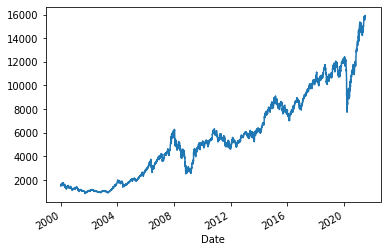

In [10]:
data['Open'].plot()

<AxesSubplot:xlabel='Date'>

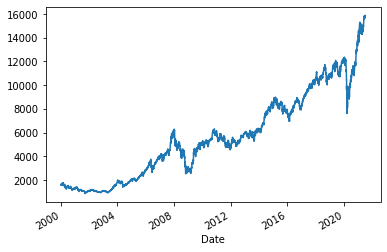

In [11]:
data['Close'].plot()

<AxesSubplot:xlabel='Date'>

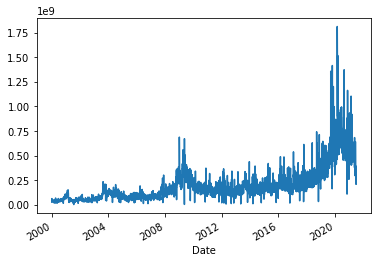

In [12]:
data['Volume'].plot()

<AxesSubplot:xlabel='Date'>

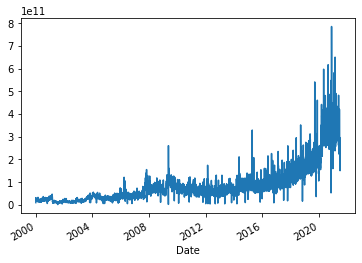

In [13]:
data['Turnover'].plot()

<AxesSubplot:xlabel='Date'>

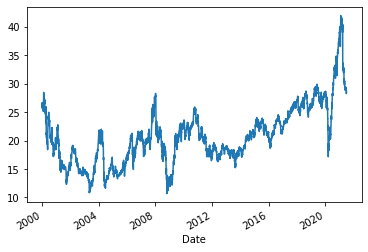

In [14]:
data['P/E'].plot()

<AxesSubplot:xlabel='Date'>

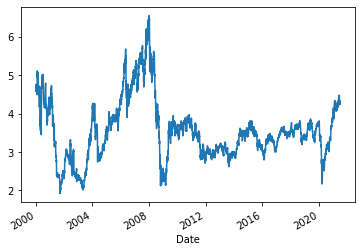

In [15]:
data['P/B'].plot()

<AxesSubplot:xlabel='Date'>

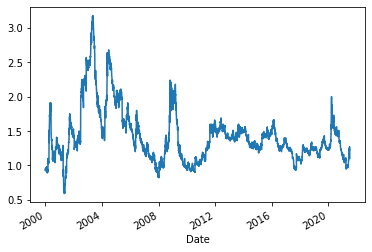

In [16]:
data['Div Yield'].plot()

<AxesSubplot:xlabel='Date'>

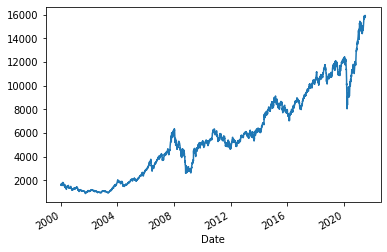

In [17]:
data['High'].plot()

<AxesSubplot:xlabel='Date'>

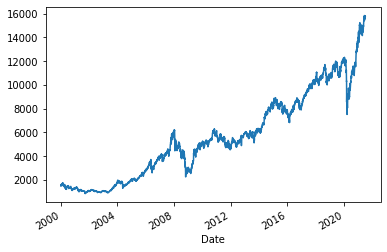

In [18]:
data['Low'].plot()

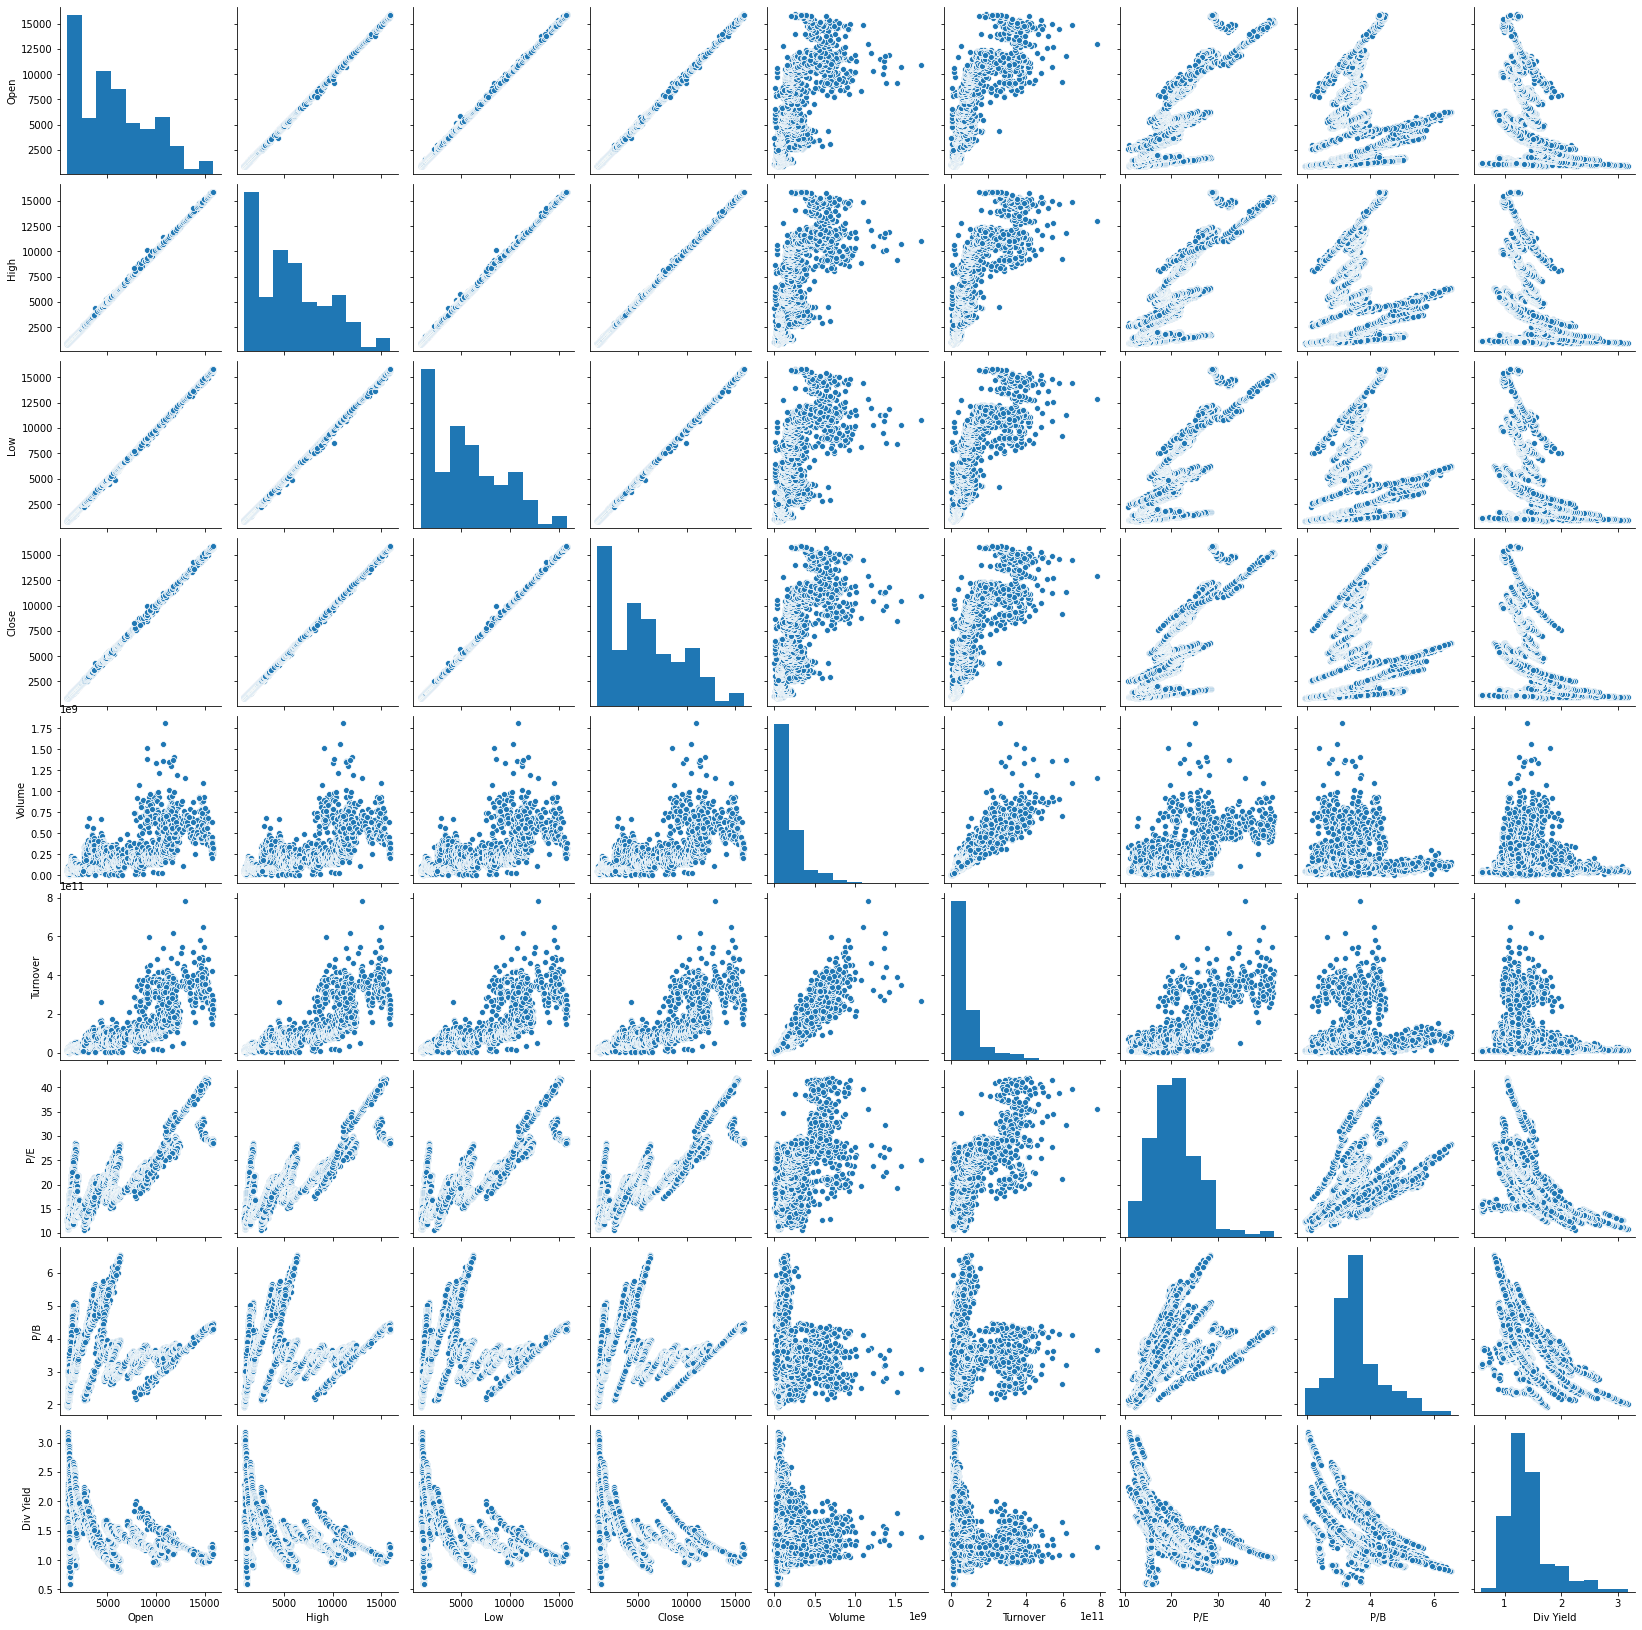

In [19]:
sns.pairplot(data)

<AxesSubplot:>

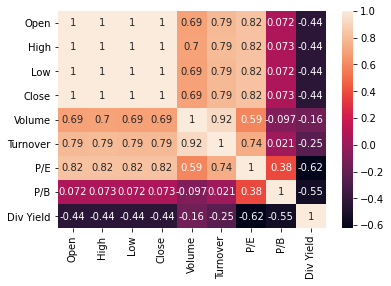

In [20]:
cor = data.corr()
sns.heatmap(cor,annot=True)

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
num_col = [cname for cname in data if data[cname].dtype in [int,float]]

In [23]:
# Ho : Data is not stationary
# H1 : Data is stationary
for i in num_col:  
    test_result = adfuller(data[i])
    print(i,test_result)
    
# Format - test statistics, p-value, usedlag(number of lags used), nobs(the number of observations used for 
# the adf regression and calculation of the critical values), critical values at 1%,5%,10% levels, 
# icbest(the maximized information criterion if autolag is not None)
# Ho > H1 : accept the null hypothesis
# H1 > Ho : reject the null hypothesis
# p-value(alpha) > p-value(cal) : reject the null hypothesis
# p-value(cal)  > p-value(aplha) : accept the null hypothesis

Open (1.091882107777062, 0.9951467407103476, 10, 5342, {'1%': -3.4315747182801055, '5%': -2.8620812006720593, '10%': -2.5670580804629393}, 61738.09016910661)
High (1.0080841962274274, 0.9943505180822994, 18, 5334, {'1%': -3.4315765560130287, '5%': -2.8620820125952537, '10%': -2.567058512677479}, 59632.424578667386)
Low (0.9235089258854194, 0.9933895812330633, 18, 5334, {'1%': -3.4315765560130287, '5%': -2.8620820125952537, '10%': -2.567058512677479}, 61524.65472536243)
Close (0.9959169554366388, 0.994222680329063, 18, 5334, {'1%': -3.4315765560130287, '5%': -2.8620820125952537, '10%': -2.567058512677479}, 61438.08456269483)
Turnover (-1.0546217420810295, 0.7328250394603615, 33, 5319, {'1%': -3.4315800166692987, '5%': -2.862083541535917, '10%': -2.56705932658522}, 269990.5378331506)
P/E (-2.6934297813403862, 0.07518212079920845, 21, 5331, {'1%': -3.431577246585554, '5%': -2.8620823176948718, '10%': -2.567058675092483}, 3384.9772303534955)
P/B (-3.070713954935855, 0.028797777616585616, 2

In [24]:
# At 5% level of significance 
# P/B and Div Yield is stationary

In [25]:
data['open_d'] = data['Open'] - data['Open'].shift(10)
data['close_d'] = data['Close'] - data['Close'].shift(10)
data['high_d'] = data['High'] - data['High'].shift(10)
data['low_d'] = data['Low'] - data['Low'].shift(10)
data['vol_d'] = data['Volume'] - data['Volume'].shift(10)
data['turn_d'] = data['Turnover'] - data['Turnover'].shift(10)
data['pe_d'] = data['P/E'] - data['P/E'].shift(10)

In [26]:
data.head(15)

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield,open_d,close_d,high_d,low_d,vol_d,turn_d,pe_d
Date,,,,,,,,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.20,25358322,8.841500e+09,25.91,4.63,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,1594.40,1641.95,1594.40,1638.70,38787872,1.973690e+10,26.67,4.76,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,1634.55,1635.50,1555.05,1595.80,62153431,3.084790e+10,25.97,4.64,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,1595.80,1639.00,1595.80,1617.60,51272875,2.531180e+10,26.32,4.70,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,1616.60,1628.25,1597.20,1613.30,54315945,1.914630e+10,26.25,4.69,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,1615.65,1662.10,1614.95,1632.95,45013949,2.375350e+10,26.57,4.74,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-11,1633.25,1639.90,1548.25,1572.50,49120254,2.596950e+10,25.59,4.57,0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-12,1572.30,1631.55,1571.70,1624.80,38364961,1.895000e+10,26.44,4.72,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-13,1627.85,1671.15,1613.65,1621.40,44738447,2.237610e+10,26.38,4.71,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# adfuller((data['open_d']).dropna())
# adfuller((data['close_d']).dropna())
# adfuller((data['high_d']).dropna())
# adfuller((data['low_d']).dropna())
# adfuller((data['vol_d']).dropna())
# adfuller((data['turn_d']).dropna())
# adfuller((data['pe_d']).dropna())

In [28]:
num_col = [cname for cname in data if data[cname].dtype in [int,float]]

In [29]:
for i in num_col:
    test_value = adfuller((data[i]).dropna())
    print(i,test_value)

Open (1.091882107777062, 0.9951467407103476, 10, 5342, {'1%': -3.4315747182801055, '5%': -2.8620812006720593, '10%': -2.5670580804629393}, 61738.09016910661)
High (1.0080841962274274, 0.9943505180822994, 18, 5334, {'1%': -3.4315765560130287, '5%': -2.8620820125952537, '10%': -2.567058512677479}, 59632.424578667386)
Low (0.9235089258854194, 0.9933895812330633, 18, 5334, {'1%': -3.4315765560130287, '5%': -2.8620820125952537, '10%': -2.567058512677479}, 61524.65472536243)
Close (0.9959169554366388, 0.994222680329063, 18, 5334, {'1%': -3.4315765560130287, '5%': -2.8620820125952537, '10%': -2.567058512677479}, 61438.08456269483)
Turnover (-1.0546217420810295, 0.7328250394603615, 33, 5319, {'1%': -3.4315800166692987, '5%': -2.862083541535917, '10%': -2.56705932658522}, 269990.5378331506)
P/E (-2.6934297813403862, 0.07518212079920845, 21, 5331, {'1%': -3.431577246585554, '5%': -2.8620823176948718, '10%': -2.567058675092483}, 3384.9772303534955)
P/B (-3.070713954935855, 0.028797777616585616, 2

<AxesSubplot:xlabel='Date'>

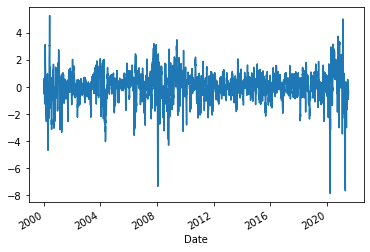

In [30]:
data['pe_d'].dropna().plot()

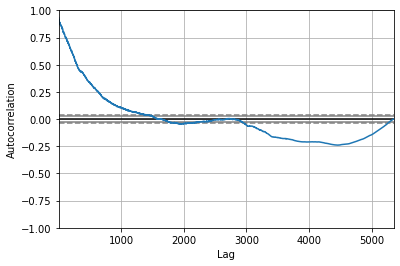

In [31]:
from  pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Turnover'])
plt.show()

In [32]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

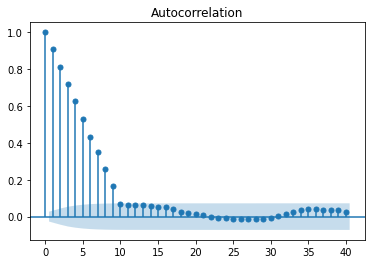

<Figure size 864x720 with 0 Axes>

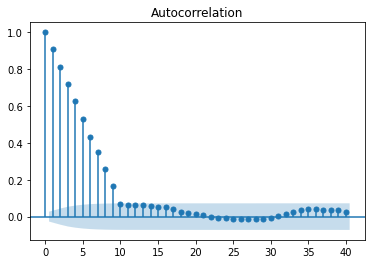

In [33]:
plt.figure(figsize=(12,10))
# ax1 = fig.add_subplot(211)
plot_acf(data['close_d'].iloc[11:],lags=40)

<Figure size 864x720 with 0 Axes>

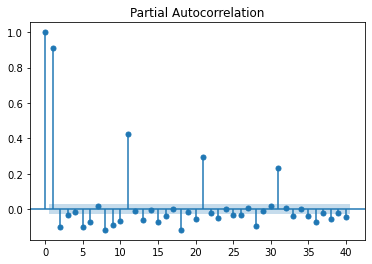

In [34]:
# ax1 = fig.add.subplot(212)
plt.figure(figsize=(12,10))
plot_pacf(data['close_d'].iloc[11:],lags=40)
plt.show()

In [35]:
# AR = p 
# MA = q 
# d 

In [36]:
from statsmodels.tsa.arima_model import ARIMA

In [37]:
model = ARIMA(data['Close'].dropna(),order=(0,1,1)) # order = p,d,q
model_fit = model.fit()

C:\Users\aishw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\aishw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [38]:
model_fit.aic

61882.3165299742

In [39]:
# 4,1,1 = 61865.20726962036
# 1,1,1  = 61878.151800414176
# 0,1,1 = 61882.3165299742

In [40]:
!jupyter nbconvert --to html ARIMA_model.ipynb

[NbConvertApp] Converting notebook ARIMA_model.ipynb to html
[NbConvertApp] Writing 494414 bytes to ARIMA_model.html
